In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [35]:
#drop all the unnecessary data, leave only the needed ones
dataset = pd.read_csv('survey_results_filtered.csv')
dataset.drop(['Respondent', 'Country', 'Hobby', 'OpenSource', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears','JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9','AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8','AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3','JobContactPriorities4','JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7',
              'UpdateCV', 'CurrencySymbol', 'CommunicationTools', 'TimeFullyProductive', 'Currency', 'Salary', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons','AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear' ,'PlatformWorkedWith', 'PlatformDesireNextYear','FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'NumberMonitors','Methodology', 'VersionControl', 'CheckInCode','AdBlocker','AdBlockerDisable', 'AdBlockerReasons','AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5','AdsPriorities6', 'AdsPriorities7', 'AIDangerous', 'AIInteresting','AIResponsible', 'AIFuture','EthicsChoice',
              'EthicsReport', 'EthicsResponsible','EthicalImplications', 'StackOverflowRecommend','StackOverflowVisit', 'StackOverflowHasAccount', 'StackOverflowParticipate','StackOverflowJobs', 'StackOverflowDevStory', 'StackOverflowJobsRecommend','StackOverflowConsiderMember', 'HypotheticalTools1','HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'ErgonomicDevices', 'Exercise','Gender', 'SexualOrientation', 'EducationParents', 'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy'], axis = 1, inplace=True) 

#remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names
dataset.drop(dataset[dataset.Student != 'No'].index, axis=0, inplace=True)
dataset.drop(dataset[dataset.Employment != 'Employed full-time'].index, axis=0, inplace=True)
dataset.dropna(inplace=True)
dataset.drop(['Student', 'Employment', 'YearsCoding'], axis = 1, inplace=True) 

#splits into a list
years_split = dataset['YearsCodingProf']
convertedYears = []
for i in years_split:
  yawa = str(i).split('-')
  if(str(yawa[0]) == '30 or more years'):
    ave = int(yawa[0].split(' ')[0])
  else:
    ave = int( (int(yawa[0]) + int(yawa[1].split(' ')[0])) / 2 )
  convertedYears.append(ave)
dataset['ConvertedYears'] = convertedYears

#the salary is already converted so no need to converted manuallly
#def convertToMonthly(x):
  #if(x['SalaryType'] == 'Yearly'):
  #  return (int(x['ConvertedSalary']) / 12)
 # elif(x['SalaryType'] == 'Weekly'):
  #  return (int(x['ConvertedSalary']) * 4)
#  else:
   # return int(x['ConvertedSalary'])

#dataset['MonthlySalary'] = dataset[['ConvertedSalary', 'SalaryType']].apply(convertToMonthly, axis=1)

dataset['FinalSalaryInPhp'] = (dataset['ConvertedSalary'] * 51) 
dataset


,YearsCodingProf,SalaryType,ConvertedSalary,ConvertedYears,FinalSalaryInPhp
1,18-20 years,Yearly,70841.0,19,3612891.0
6,0-2 years,Yearly,120000.0,1,6120000.0
8,21-23 years,Yearly,250000.0,22,12750000.0
17,0-2 years,Monthly,47904.0,1,2443104.0
20,12-14 years,Yearly,95968.0,13,4894368.0
...,...,...,...,...,...
3308,3-5 years,Monthly,6204.0,4,316404.0
3309,0-2 years,Monthly,43200.0,1,2203200.0
3310,3-5 years,Monthly,8100.0,4,413100.0
3312,12-14 years,Yearly,102000.0,13,5202000.0


In [36]:
#https://intellipaat.com/community/3011/pandas-resetindex-after-groupby-valuecounts
grouped_dataset = dataset.groupby(['ConvertedYears']).mean()
grouped_dataset = grouped_dataset.reset_index()
grouped_dataset

,ConvertedYears,ConvertedSalary,FinalSalaryInPhp
0,1,77816.198582,3.968626e+06
1,4,91549.342790,4.669016e+06
2,7,102388.039409,5.221790e+06
3,10,122685.177215,6.256944e+06
4,13,105541.025316,5.382592e+06
5,16,156284.515152,7.970510e+06
6,19,176495.892857,9.001291e+06
7,22,167178.344828,8.526096e+06
8,25,93889.666667,4.788373e+06
9,28,211511.571429,1.078709e+07


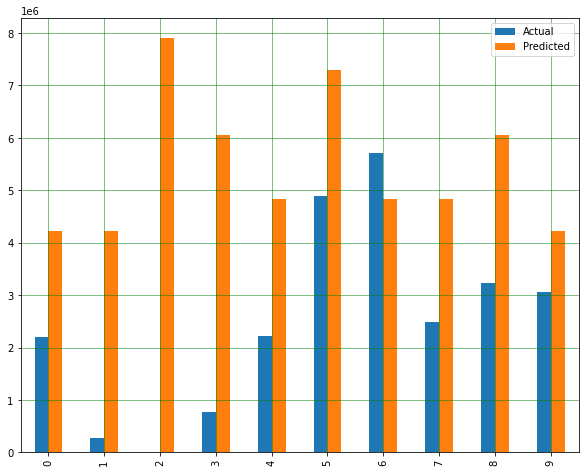

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(10)
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
df1.plot(kind='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

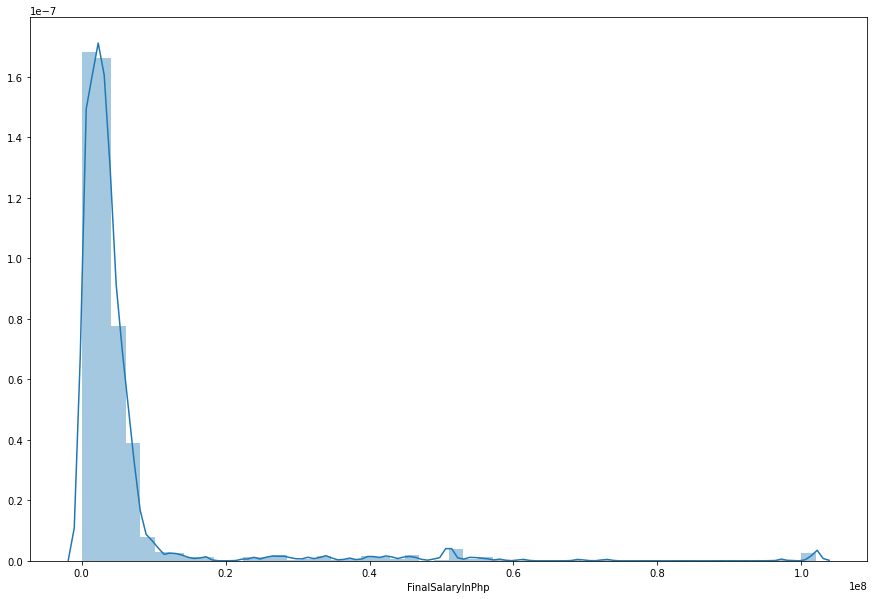

In [38]:

X = dataset[['ConvertedYears']].values
y = dataset['FinalSalaryInPhp'].values

#plot the datapoints to see the relationship
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['FinalSalaryInPhp'])


Text(0, 0.5, 'Salary')

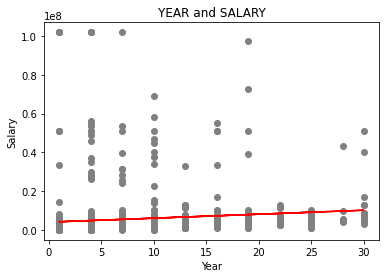

In [39]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('YEAR and SALARY')
plt.xlabel('Year')
plt.ylabel('Salary')